In [1]:
import numpy as np
import pandas as pd

# Get the data

In [10]:
column_names = ['User_ID', 'item_id', 'Rating', 'Timestamp']
df = pd.read_csv('movies_data', sep='\t', names=column_names)# by default, separator in the data is \t

In [11]:
df.head()

,User_ID,item_id,Rating,Timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [12]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Merging both the datasets together on the basis of Item ID

In [14]:
df = pd.merge(df, movie_titles, on='item_id')

In [15]:
df.head()

,User_ID,item_id,Rating,Timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# Exploratory Data Analysis [EDA]

# Visualization imports

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
sns.set_style('white') # white background
%matplotlib inline

Ratings dataframe with average rating and number of ratings

In [23]:
df.groupby('title')['Rating'].mean().sort_values(ascending=False).head() 
#Descending order

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: Rating, dtype: float64

In [24]:
df.groupby('title')['Rating'].count().sort_values(ascending=False).head()
# Number of ratings per movie

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: Rating, dtype: int64

In [25]:
# New dataframe
ratings = pd.DataFrame(df.groupby('title')['Rating'].mean())

In [26]:
ratings.head()

,Rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [27]:
ratings['Number of Ratings'] = pd.DataFrame(df.groupby('title')['Rating'].count())
ratings.head()

,Rating,Number of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


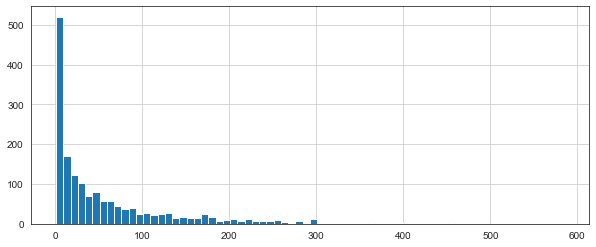

In [28]:
plt.figure(figsize = (10,4))
ratings['Number of Ratings'].hist(bins = 70)

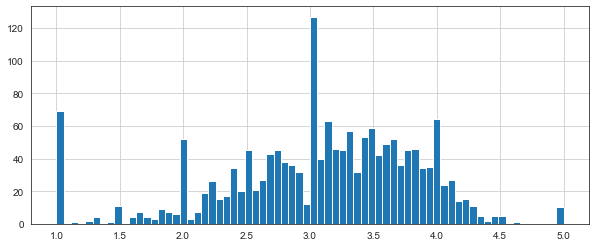

In [30]:
plt.figure(figsize = (10,4))
ratings['Rating'].hist(bins = 70)

Forms a Gaussian normal distribution with a few outliers

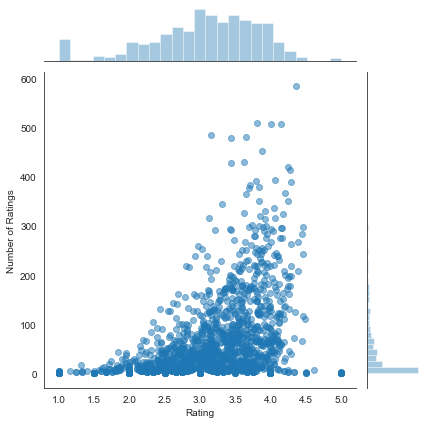

In [33]:
sns.jointplot(x='Rating', y='Number of Ratings', data=ratings, alpha=0.5)

# Recommending Similar Movies

Creating a matrix that has the user ids on one axis and the movie title on another axis.

Each cell will then consist of the rating the user gave to that movie.

There are a lot of NaN values, because most people have not seen most of the movies.

In [36]:
moviesmatrix = df.pivot_table(index = 'User_ID', columns = 'title', values='Rating')

In [37]:
moviesmatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User_ID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movie

In [39]:
ratings.sort_values('Number of Ratings', ascending=False).head(10)

,Rating,Number of Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Let's choose two movies: Star Wars and Liar Liar

In [40]:
ratings.head()

,Rating,Number of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [45]:
starwars_user_ratings = moviesmatrix['Star Wars (1977)']
liarliar_user_ratings = moviesmatrix['Liar Liar (1997)']

In [46]:
starwars_user_rating.head()

User_ID
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [47]:
type(starwars_user_rating)

pandas.core.series.Series

Finding correlation between two pandas series

In [48]:
similar_to_starwars = moviesmatrix.corrwith(starwars_user_ratings)
similar_to_liarliar = moviesmatrix.corrwith(liarliar_user_ratings)

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [49]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

Removing null values and using a Dataframe instead of a series

In [50]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])

In [51]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [52]:
corr_starwars.dropna(inplace=True)

In [53]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


Now, when we sort the dataframe on the basis of correlation we will get the movies similar to Star Wars

We may get some results which do not make sense, this is because there are a lot of movies only watched once by users who also watched Star Wars

In [54]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


The above problem can be fixed by filtering out movies that have less than 100 reviews (this value was chosen based on the histogram from earlier).

In [55]:
corr_starwars = corr_starwars.join(ratings['Number of Ratings'])
corr_starwars.head()

,Correlation,Number of Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Sorting and filtering the movie titles

In [58]:
corr_starwars[corr_starwars['Number of Ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,Number of Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Doing the same thing for the movie Liar Liar

In [59]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['Number of Ratings'])
corr_liarliar[corr_liarliar['Number of Ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,Number of Ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


Star Wars

Suggestion 1: Empire Strikes Back

Liar Liar

Suggestion 1: Batman Forever